# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# print(f"The latitude information received is: {lats}")
# print(f"The longituted information received is: {lngs}")

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
units = "imperial"

city_data =[]


for city in cities:
    city_url = url + "&q=" + city.replace(" ","+")
    print(city_url)
    break
    response = requests.get(url + city).json()
    print(response)
    break
    lats.append(response['coord']['lat'])
    lngs.append(response['weather']['temp'])



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0238de5485a69775c3a392e7664a59cf&q=tir+pol


In [40]:
for i, city in enumerate(cities):
        
    # time.sleep()

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    city_weather = requests.get(city_url).json()

    
    try:
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description = city_weather["weather"][0]["description"]
      

        city_data.append({"City": city_weather["name"], 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Current Description": city_weather_description,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Current Description', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country'])

# city_data_df = pd.DataFrame(city_data)


In [42]:
print(city_data_df)

                   City      Lat       Lng  Max Temp Current Description  \
0                Albany  42.6001  -73.9662     84.63     overcast clouds   
1                Castro -24.7911  -50.0119     51.78     overcast clouds   
2                  Puri  19.8000   85.8500     79.32     overcast clouds   
3            Baker City  44.7749 -117.8344     92.91           clear sky   
4             Busselton -33.6500  115.3333     48.11    scattered clouds   
..                  ...      ...       ...       ...                 ...   
557        Quatre Cocos -20.2078   57.7625     69.10       broken clouds   
558            Moranbah -22.0016  148.0466     67.73           clear sky   
559  Comodoro Rivadavia -45.8667  -67.5000     58.86           clear sky   
560       Srednekolymsk  67.4500  153.6833     59.22     overcast clouds   
561      Cap Malheureux -19.9842   57.6142     69.48          few clouds   

     Humidity  Cloudiness  Wind Speed Country  
0          48         100        1.99  

In [51]:
city_data_df.dropna()
city_data_df.count()

City                   562
Lat                    562
Lng                    562
Max Temp               562
Current Description    562
Humidity               562
Cloudiness             562
Wind Speed             562
Country                562
dtype: int64

In [54]:
# Export the city_data into a csv
output_data_file = "../starter_code/vacation.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.head(25)


,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,Albany,42.6001,-73.9662,84.63,overcast clouds,48,100,1.99,US
1,Castro,-24.7911,-50.0119,51.78,overcast clouds,93,86,5.03,BR
2,Puri,19.8000,85.8500,79.32,overcast clouds,80,100,4.32,IN
3,Baker City,44.7749,-117.8344,92.91,clear sky,26,0,5.75,US
4,Busselton,-33.6500,115.3333,48.11,scattered clouds,70,32,9.35,AU
5,Upernavik,72.7868,-56.1549,40.46,scattered clouds,76,34,7.20,GL
6,Chumikan,54.7183,135.3150,57.47,overcast clouds,73,100,15.12,RU
7,Saint George,37.1041,-113.5841,91.63,broken clouds,36,75,28.77,US
8,Flin Flon,54.7682,-101.8650,73.24,smoke,56,100,4.61,CA
9,Punta Arenas,-53.1500,-70.9167,39.31,broken clouds,81,75,11.50,CL


In [44]:
# humidity = city_data_df["Humidity"] >100
# humidity.head()

0    False
1    False
2    False
3    False
4    False
Name: Humidity, dtype: bool

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [56]:
city_data_df["Humidity"].describe()

count    562.000000
mean      73.206406
std       18.763471
min       16.000000
25%       64.000000
50%       77.500000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

/Users/xilo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


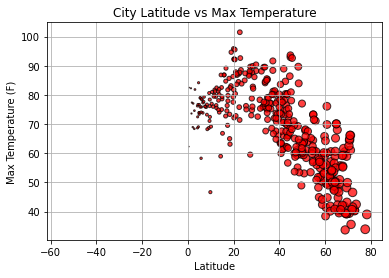

In [45]:
# # The maximum x value for our chart will be 100
# x_limit = 100


x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatMaxTemp.png")

# Show plot
plt.show()

# Analysis 

## Latitude vs. Humidity Plot

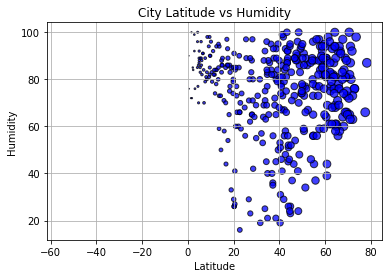

In [97]:
# # The maximum x value for our chart will be 100
# x_limit = 100


y_axis_humidity = city_data_df["Humidity"]

plt.scatter(x_axis, y_axis_humidity, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatHumidity.png")

# Show plot
plt.show()

# Analysis 

## Latitude vs. Cloudiness Plot

# Analysis

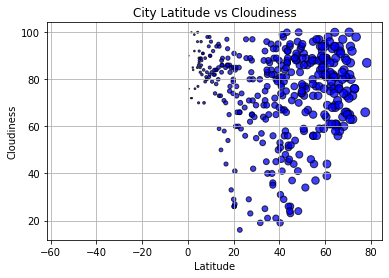

In [98]:
# # The maximum x value for our chart will be 100
# x_limit = 100


y_axis_cloud = city_data_df["Cloudiness"]

plt.scatter(x_axis, y_axis_humidity, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityCloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

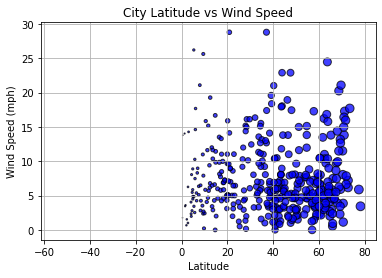

In [49]:

y_axis_wind = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis_wind, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [69]:
## filter your main dataframe where LAT>0 for Northern, LAT<0 for Southern hemispheres

# weather_data_north = city_data_df[city_data_df['Lat'] > 0]
city_data_north = city_data_df[city_data_df['Lat'] > 0]
# weather_data_north.count()

city_data_south = city_data_df[city_data_df['Lat'] < 0]
# weather_data_south.count()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

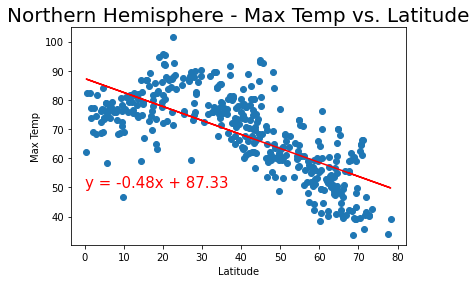

In [102]:
x_value_north = city_data_north['Lat']
y_value = city_data_north['Max Temp']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value)
regress_values = x_value_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_north,y_value)
plt.plot(x_value_north,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("latitude_vs_humidity.png")
plt.show


# Analysis

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

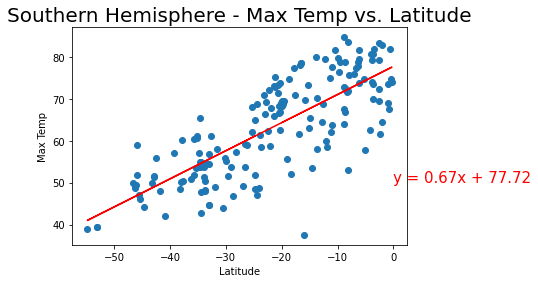

In [92]:
x_value_south = city_data_south['Lat']
y_value_so_hm = city_data_south['Max Temp']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_south, y_value_so_hm)
regress_values = x_value_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_south,y_value_so_hm)
plt.plot(x_value_south,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

# Analysis

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

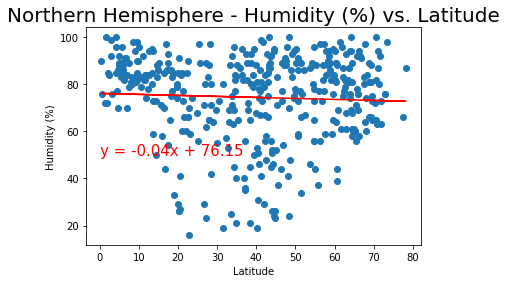

In [86]:
y_value_hum = city_data_north['Humidity']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value_hum)
regress_values = x_value_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_north,y_value_hum)
plt.plot(x_value_north,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

# Analysis

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

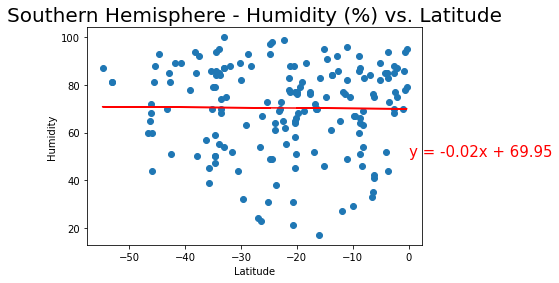

In [93]:
y_value_so_humid = city_data_south['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_south, y_value_so_humid)
regress_values = x_value_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_south,y_value_so_humid)
plt.plot(x_value_south,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

# Analysis 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

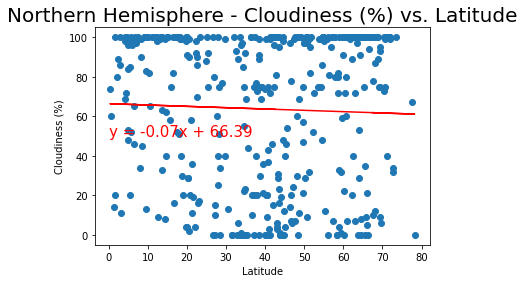

In [87]:
y_value_cloud = city_data_north['Cloudiness']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value_cloud)
regress_values = x_value_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_north,y_value_cloud)
plt.plot(x_value_north,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

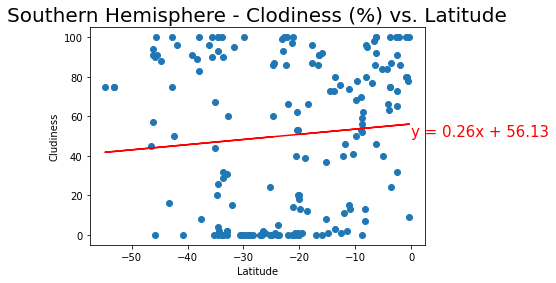

In [94]:
y_value_so_cloud = city_data_south['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_south, y_value_so_cloud)
regress_values = x_value_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_south,y_value_so_cloud)
plt.plot(x_value_south,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Clodiness (%) vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Cludiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

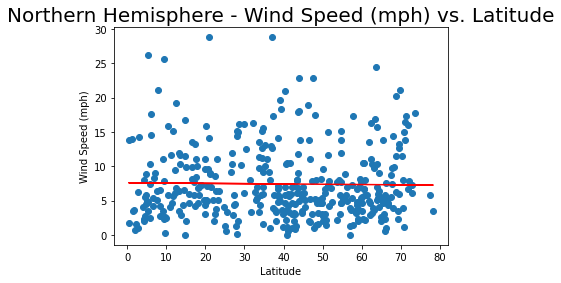

In [89]:
y_value_speed = city_data_north['Wind Speed']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value_speed)
regress_values = x_value_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_north,y_value_speed)
plt.plot(x_value_north,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

# Analysis

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

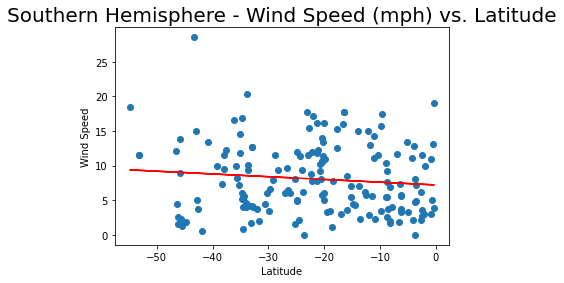

In [95]:
y_value_so_wind = city_data_south['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_south, y_value_so_wind)
regress_values = x_value_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_south,y_value_so_wind)
plt.plot(x_value_south,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()